In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
example = pd.read_csv('hourconsumption_norm.csv', header=None, names=['ratio'])

read data from meter    

In [3]:
dmitri_power = pd.read_csv('power_meter_xavier_average_1_hour.txt', sep=' ', header=None, names=['power', 'time'])

In [4]:
dmitri_power['time'] = pd.to_datetime(dmitri_power['time'])

<Axes: title={'center': 'Dmitri Power Consumption'}, xlabel='Time (s)', ylabel='Power (W)'>

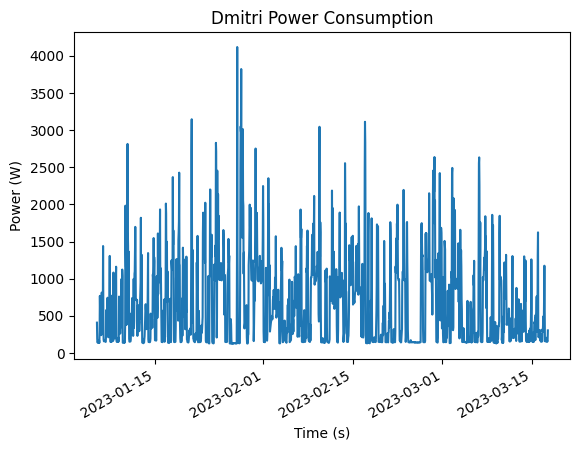

In [5]:
dmitri_power.plot(x='time', y='power', title='Dmitri Power Consumption', xlabel='Time (s)', ylabel='Power (W)', legend=False)

<Axes: title={'center': 'Hourly Average Power Consumption'}, xlabel='Hour of Day', ylabel='Average Power (W)'>

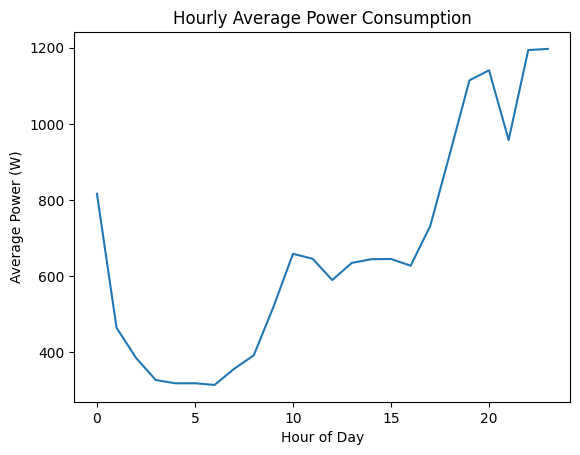

In [6]:
# calculate the average power consumption for hour of the day
def calculate_hourly_average_power(df):
    df['hour'] = df['time'].dt.hour
    hourly_avg = df.groupby('hour')['power'].mean().reset_index()
    return hourly_avg
hourly_avg = calculate_hourly_average_power(dmitri_power)

# plot the hourly average power consumption
hourly_avg.plot(x='hour', y='power', title='Hourly Average Power Consumption', xlabel='Hour of Day', ylabel='Average Power (W)', legend=False)

<Axes: title={'center': 'Normalized Power Consumption'}, xlabel='Hour of Day', ylabel='Normalized Power'>

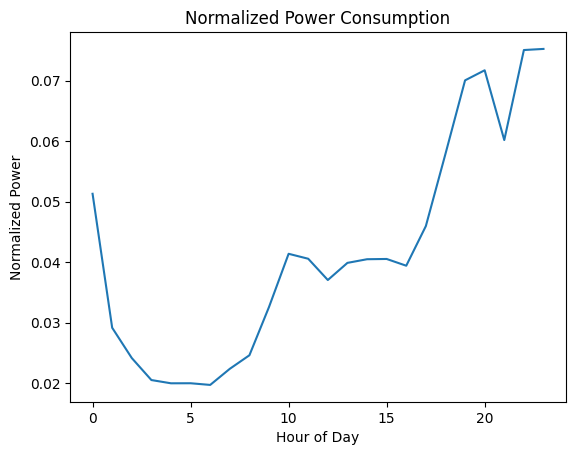

In [7]:
normalized_power = pd.DataFrame()
normalized_power['hour'] = hourly_avg['hour']
# normalized power is the ration of the hourly_avg power to the hourly_avg total power
# 
normalized_power['normalized_power'] = hourly_avg['power'] / hourly_avg['power'].sum()

# plot the normalized power consumption
normalized_power.plot(x='hour', y='normalized_power', title='Normalized Power Consumption', xlabel='Hour of Day', ylabel='Normalized Power', legend=False)


In [8]:
# make normalized_power the same shape as example and write to file with the same structure as example
normalized_power = normalized_power.set_index('hour').reindex(range(24), fill_value=0).reset_index()

# write to file
normalized_power[['normalized_power']].to_csv('normalized_power.csv', index=False, header=False)

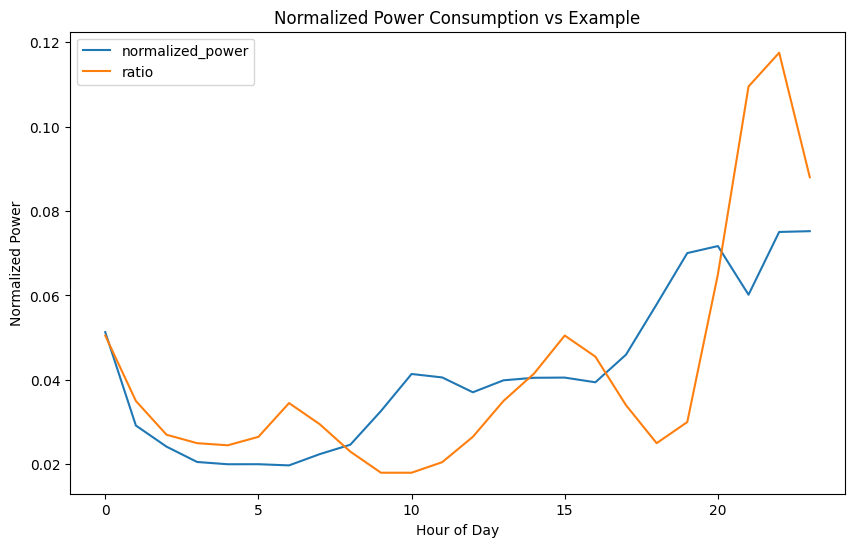

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both series on the same axis
normalized_power[['normalized_power']].plot(ax=ax, label='Normalized Power')
example.plot(ax=ax, label='Example')

# Customize the plot
ax.set_title('Normalized Power Consumption vs Example')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Normalized Power')
ax.legend()

# Show the plot
plt.show()